Presenting **Noisy Quantum Random Generator**

In [2]:
#importing libraries
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [3]:
provider = IBMQ.load_account()

/home/rochisha/anaconda3/envs/quantum/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


#### Results using our circuit

5f8049c196ad5500139a46f4
Job Status: job has successfully run
{'000': 1484, '001': 1130, '010': 770, '011': 1060, '100': 882, '101': 1006, '110': 734, '111': 1126}


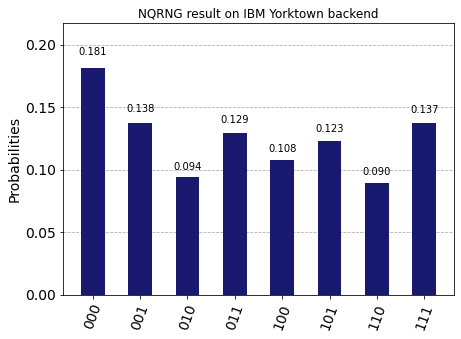

In [5]:
backend = provider.backends.ibmqx2
real_circ = QuantumCircuit(3, 3)
for i in range(200):
    real_circ.u3(0,0,0,0)
    real_circ.u3(0,0,0,1)
    real_circ.u3(0,0,0,2)
    real_circ.cx(0,1)
    real_circ.cx(1,2)
    real_circ.cx(2,0)
    real_circ.barrier()


real_circ.measure([0, 1, 2], [0, 1, 2])

job_exp = execute(real_circ, backend=backend, shots=8192)
print(job_exp.job_id())

job_monitor(job_exp)
exp_result = job_exp.result()

exp_measurement_result = exp_result.get_counts(real_circ)
print(exp_measurement_result)
plot_histogram(exp_measurement_result, color='midnightblue', title="NQRNG result on IBM Yorktown backend")

#### Results using conventional hadamard circuit

5f8023ad200087001313ba5a
Job Status: job has successfully run
{'000': 1124, '001': 1241, '010': 806, '011': 1153, '100': 882, '101': 1074, '110': 759, '111': 1153}


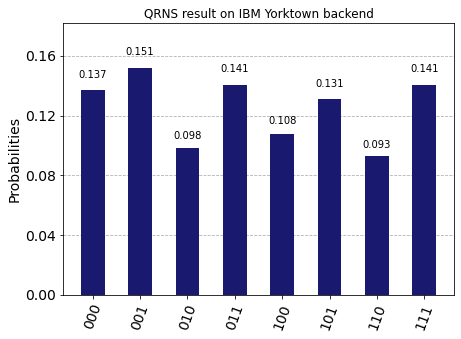

In [67]:
backend = provider.backends.ibmqx2
hada= QuantumCircuit(3, 3)

hada.h(0)
hada.h(1)
hada.h(2)

hada.measure([0, 1, 2], [0, 1, 2])

job_exp = execute(hada, backend=backend, shots=8192)
print(job_exp.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job_exp)
exp_result = job_exp.result()
exp_measurement_result_hada = exp_result.get_counts(hada)
print(exp_measurement_result_hada)
plot_histogram(exp_measurement_result_hada, color='midnightblue', title="QRNS result on IBM Yorktown backend")

plot_histogram(exp_measurement_result_hada, color='midnightblue', title="QRNG result on IBM Yorktown backend")

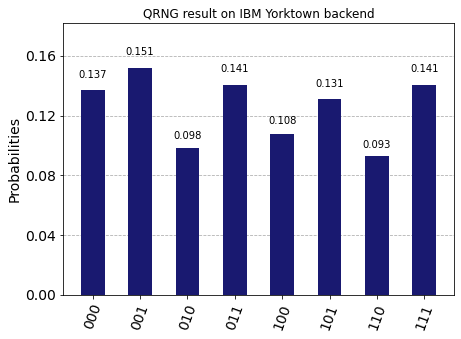

In [68]:
plot_histogram(exp_measurement_result_hada, color='midnightblue', title="QRNG result on IBM Yorktown backend")

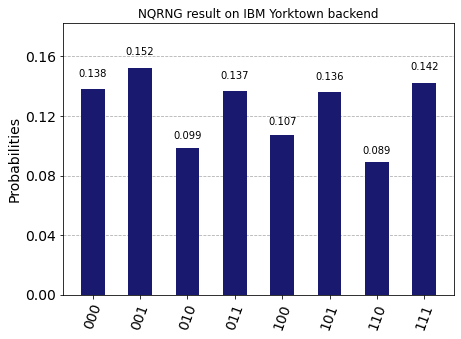

In [70]:
plot_histogram(exp_measurement_result, color='midnightblue', title="NQRNG result on IBM Yorktown backend")

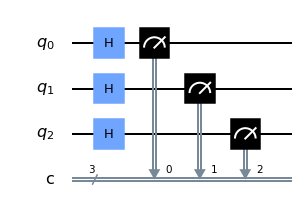

In [71]:
hada.draw('mpl')

5f804b5096ad5500139a4704
Job Status: job has successfully run
{'000': 7096, '001': 448, '010': 61, '011': 84, '100': 49, '101': 166, '110': 77, '111': 211}


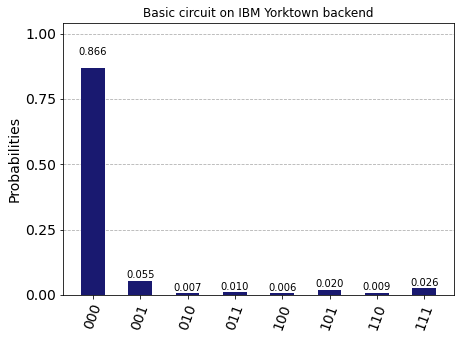

In [6]:
backend = provider.backends.ibmqx2
real_circ = QuantumCircuit(3, 3)

real_circ.u3(0,0,0,0)
real_circ.u3(0,0,0,1)
real_circ.u3(0,0,0,2)
real_circ.cx(0,1)
real_circ.cx(1,2)
real_circ.cx(2,0)



real_circ.measure([0, 1, 2], [0, 1, 2])

job_exp = execute(real_circ, backend=backend, shots=8192)
print(job_exp.job_id())

job_monitor(job_exp)
exp_result = job_exp.result()

exp_measurement_result = exp_result.get_counts(real_circ)
print(exp_measurement_result)
plot_histogram(exp_measurement_result, color='midnightblue', title="Basic circuit on IBM Yorktown backend")

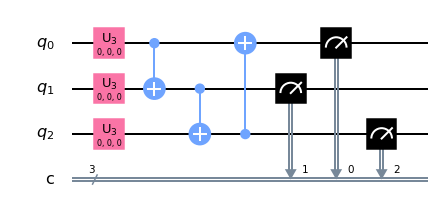

In [8]:
real_circ.draw('mpl')